In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
df = pd.read_csv(filepath_or_buffer='business_analyst.csv', sep=',')

In [3]:
display(df[['location', 'query', 'job', 'currentJob', 'pastJob']])

,location,query,job,currentJob,pastJob
0,Canada,business analyst,Business analyst,NaN,Business Analyst at Greenwich Associates
1,"Edmonton, Canada Area",business analyst,Business Analyst,NaN,"Business Analyst at Government of Alberta, Min..."
2,"Edmonton, Canada Area",business analyst,Business Analyst,Business Analyst at University of Alberta,NaN
3,"Edmonton, Canada Area",business analyst,Business Analyst at Weatherford,none,NaN
4,"Edmonton, Canada Area",business analyst,Business Analyst,Sr. Business Analyst at Canadian Western Bank,NaN
5,"Edmonton, Canada Area",business analyst,Business Analyst at liberty,Business Analyst at at liberty,NaN
6,"Edmonton, Canada Area",business analyst,Business Analyst at Finning Digital,none,NaN
7,"Edmonton, Canada Area",business analyst,Business Analyst at Goverment of Alberta,none,NaN
8,"Edmonton, Canada Area",business analyst,Business Analyst,Business Process Analyst at ATCO Gas,NaN
9,"Edmonton, Canada Area",business analyst,Business Analyst,Business Analyst at WCB,NaN


In [2]:
def split_job(df, column='job', title='title', company='company'):
    return df[column].str.split(' at ', expand=True, n=1).rename(columns={0: 'title', 1: 'company'})


def count_column(df, column='company'):
    return df[column].value_counts(ascending=False, dropna=True)

In [5]:
df2 = split_job(df, column='currentJob')
df2['company'].unique()

array([nan, 'University of Alberta', None, 'Canadian Western Bank',
       'at liberty', 'ATCO Gas', 'WCB', 'Alcanna', 'CGI',
       'Parkland County', 'Government of Alberta, Students Finance',
       "Workers' Compensation Board", 'Stantec', 'TELUS', 'WCB Alberta',
       'Deloitte Canada', 'Servus Credit Union', 'Pleasant Solutions',
       'The Association of Professional Engineers and Geoscientists of Alberta (APEGA)',
       'Alberta Blue Cross', 'Innovation and Advanced Education',
       'AutoCanada', 'Finning (Canada)',
       'Canadian Energy Workers Association', 'Capgemini', 'Enbridge',
       'Accenture', 'Live To Play Sports', 'Computronix',
       'Govt. of Alberta', 'Alberta Health Services', 'RBC',
       'Alberta School Employee Benefits Plan', 'City of Edmonton',
       "Workers' Compensation Board of Alberta", 'PCL Construction',
       'Metegrity Inc.', 'Silvacom™', 'Ontario Systems Inc.',
       'Harris Computer', 'Hewlett-Packard', 'Edmonton Police Service',
    

In [6]:
df2.groupby('company').count().head(10)

,title
company,
(free lance),1
.,1
1910325 Alberta Ltd,1
604media,1
A.C International,1
AJW Group,1
ALDO Group,1
ATB Financial,6
ATCO Electric,4


In [7]:
ba = df2['company'].value_counts(ascending=False, dropna=True)
display(ba.head(10))

City of Edmonton                                     21
TELUS                                                16
Government of Alberta                                12
Alberta Blue Cross                                    8
CGI                                                   6
University of Alberta                                 6
ATB Financial                                         6
Canadian Western Bank                                 6
TD                                                    5
Alberta Investment Management Corporation (AIMCo)     5
Name: company, dtype: int64

In [8]:
ba.to_excel('business_analyst_by_company.xlsx', sheet_name='ba', index_label='company',header=['BA'])

In [9]:
df = pd.read_csv(filepath_or_buffer='data_analyst.csv', sep=',')
df2 = split_job(df, column='job')
df3 = split_job(df, column='currentJob')

da = df2['company'].value_counts(ascending=False, dropna=True)

In [ ]:
display(df2['title'].value_counts(ascending=False, dropna=True).head(10))

In [ ]:
display(df3['company'].value_counts(ascending=False, dropna=True).head(10))

In [4]:
files = ['business_analyst.csv', 'data_analyst.csv', 'financial_analyst.csv']

In [11]:
for f in files:
    print('___-=',f,'=-__________')
    df = pd.read_csv(filepath_or_buffer=f, sep=',')
    df2 = split_job(df, column='job')
    display(count_column(df2,'company').head(20))
    
    df2 = split_job(df, column='currentJob')
    display(count_column(df2,'company').head(20))

___-= business_analyst.csv =-__________


Government of Alberta                                41
City of Edmonton                                     34
TELUS                                                34
Alberta Blue Cross                                   14
Alberta Health Services                              10
McKinsey & Company                                   10
ATB Financial                                        10
CGI                                                   9
EPCOR                                                 9
ATCO Electric                                         7
University of Alberta                                 7
WCB                                                   6
ATCO Group                                            6
Canadian Western Bank                                 6
CIBC                                                  6
Deloitte                                              6
Alberta Investment Management Corporation (AIMCo)     6
Alberta Gaming and Liquor Commission            

City of Edmonton                                     21
TELUS                                                16
Government of Alberta                                12
Alberta Blue Cross                                    8
CGI                                                   6
University of Alberta                                 6
ATB Financial                                         6
Canadian Western Bank                                 6
TD                                                    5
Alberta Investment Management Corporation (AIMCo)     5
CIBC                                                  5
Alberta Health Services                               5
ATCO Group                                            4
TELUS Communications                                  4
Accenture                                             4
Finning (Canada)                                      4
PCL Construction                                      4
Deloitte Canada                                 

___-= data_analyst.csv =-__________


Scotiabank                 17
TD                         17
RBC                        13
Alberta Health Services    12
Government of Alberta       9
TELUS                       7
CIBC                        5
RBC Capital Markets         5
EPCOR                       5
Shopify                     4
Metrolinx                   4
TD Insurance                4
University of Alberta       4
Bell                        4
LoyaltyOne                  4
ATB Financial               4
City of Edmonton            4
Electronic Arts (EA)        3
Behaviour Interactive       3
Sun Life Financial          3
Name: company, dtype: int64

TD                         12
RBC                         8
Scotiabank                  7
Government of Alberta       7
Alberta Health Services     7
City of Edmonton            4
Bell                        4
IBM                         4
BMO Financial Group         3
Aimia Inc                   3
ALDO Group                  3
Uber                        3
CN                          3
RBC Capital Markets         3
PSL Group                   3
CIBC                        3
TD Insurance                3
Ubisoft                     3
QHR Technologies            3
ATB Financial               2
Name: company, dtype: int64

___-= financial_analyst.csv =-__________


ATB Financial                17
TELUS                        11
Alberta Health Services       8
Government of Alberta         8
RBC                           8
University of Alberta         7
Stantec                       5
City of Edmonton              4
BMO Financial Group           4
Scotiabank                    4
TD                            4
IBM                           3
LawDepot                      3
Enbridge                      3
Westmoreland Coal Company     3
Alberta Motor Association     3
Deloitte                      3
Amazon                        2
CGI                           2
Wells Fargo                   2
Name: company, dtype: int64

ATB Financial                                                                                4
CGI                                                                                          4
BRP                                                                                          3
Stantec                                                                                      3
TELUS                                                                                        3
RBC                                                                                          3
Alberta Health Services                                                                      3
IBM Canada                                                                                   3
Loblaw Companies Limited                                                                     3
Western Economic Diversification Canada | Diversification de l’économie de l’Ouest Canada    2
Canadian Tire Corporation                         

In [5]:
df = pd.DataFrame()
for f in files:
    print('___-=',f)
    d = pd.read_csv(filepath_or_buffer=f, sep=',')
    df = df.append(d)
df = df.drop(columns=['query'])
print(df.shape)
df = df.drop_duplicates(keep='first')
print(df.shape)

___-= business_analyst.csv
___-= data_analyst.csv
___-= financial_analyst.csv
(2388, 7)
(2366, 7)


In [6]:
df.to_excel('linkedin_member.xlsx', sheet_name='members')

In [13]:
display(df.head(3))

(2366, 7)


,currentJob,job,location,name,pastJob,profileImageUrl,url
0,NaN,Business analyst,Canada,Ramanpreet Sapra,Business Analyst at Greenwich Associates,NaN,https://www.linkedin.com/in/ramanpreet-sapra-6...
1,NaN,Business Analyst,"Edmonton, Canada Area",Judy Soni,"Business Analyst at Government of Alberta, Min...",NaN,https://www.linkedin.com/in/judy-soni-28888738/
2,Business Analyst at University of Alberta,Business Analyst,"Edmonton, Canada Area",Robin Mwesigye,NaN,https://media.licdn.com/dms/image/C4D03AQFB0vR...,https://www.linkedin.com/in/robin-mwesigye-b8a...


In [9]:
d['profileImageUrl'].head(3)

0    https://media.licdn.com/dms/image/C5603AQFQOlc...
1    https://media.licdn.com/dms/image/C4E03AQGqojK...
2    https://media.licdn.com/dms/image/C5103AQFNnz8...
Name: profileImageUrl, dtype: object

In [18]:
df2 = split_job(df, column='job')

In [20]:
len(list(df2['title'].unique()))

1006

In [21]:
len(list(df2['company'].unique()))


852

In [29]:
df2['company'].value_counts()

Government of Alberta                                                                  58
TELUS                                                                                  52
City of Edmonton                                                                       42
Alberta Health Services                                                                30
ATB Financial                                                                          30
TD                                                                                     25
Scotiabank                                                                             23
RBC                                                                                    21
University of Alberta                                                                  17
EPCOR                                                                                  16
Alberta Blue Cross                                                                     14
CGI       

In [73]:
#https://sigdelta.com/blog/text-analysis-in-pandas/
#https://pandas.pydata.org/pandas-docs/stable/visualization.html

In [30]:
filtered = df2.groupby('company').filter(lambda x: len(x) >= 3)

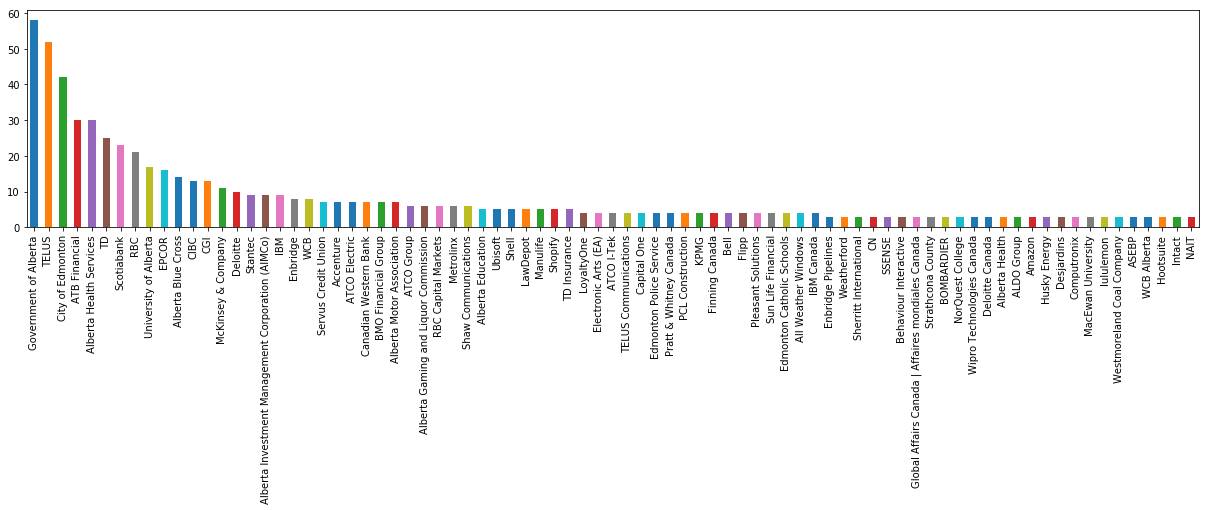

In [37]:
filtered['company'].value_counts().plot.bar(figsize=(21, 4))

In [70]:
writer = pd.ExcelWriter('results.xlsx', engine='xlsxwriter')

In [71]:
filtered.to_excel(writer, sheet_name='company_filtered')

In [72]:
filtered['company'].value_counts().to_excel(writer, sheet_name='company')

In [74]:
res = pd.read_excel(io='company_info.xlsx', sheet_name='company')

In [75]:
res = res.sort_values(by=['Sector','target'], ascending=[1, 0]).set_index(['Sector', 'company'])

In [76]:
res.to_excel(writer, sheet_name='company_group')

In [77]:
writer.save()

In [67]:
r = res.set_index(['Sector'])
r =r.sort_values(by=['target'], ascending=[0, ])
r = res.set_index(['Sector', 'company'])
r = r.sort_index(axis=0, level=None, ascending=True)
r


target
Sector         company                                                  
Engineering    Finning Canada                                          4
               PCL Construction                                        4
               Pratt & Whitney Canada                                  4
               Stantec                                                 9
Essential      ATCO Electric                                           7
               ATCO Group                                              6
               ATCO I-Tek                                              4
               Bell                                                    4
               EPCOR                                                  16
               Shaw Communications                                     6
               TELUS                                                  52
               TELUS Communications                                    4
Financial      ATB Financial                                          30
               Alberta Investment Management Corporation (AIMCo)       9
               BMO Financial Group                                     7
               CIBC                                                   13
               Canadian Western Bank                                   7
               Capital One                                             4
               Desjardins                                              3
               RBC                                                    21
               RBC Capital Markets                                     6
               Scotiabank                                             23
               Servus Credit Union                                     7
               Sun Life Financial                                      4
               TD                                                     25
Firm           CGI                                                    13
               KPMG                                                    4
               McKinsey & Company                                     11
               Pleasant Solutions                                      4
               Wipro Technologies Canada                               3
...                                                                  ...
IT             Accenture                                               7
               Amazon                                                  3
               Behaviour Interactive                                   3
               Computronix                                             3
               Electronic Arts (EA)                                    4
               Hootsuite                                               3
               IBM                                                     9
               IBM Canada                                              4
               LoyaltyOne                                              4
               Ubisoft                                                 5
NO – GO        Deloitte                                               10
               Deloitte Canada                                         3
               Enbridge                                                8
               Enbridge Pipelines                                      3
               Husky Energy                                            3
               Shell                                                   5
               Sherritt International                                  3
               Weatherford                                             3
               Westmoreland Coal Company                               3
Service        ALDO Group                                              3
               All Weather Windows                                     4
               Flipp                                                   4
               LawDepot                            